# Titanic - Machine Learning from Disaster

### Import module and load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
test_id = test_df['PassengerId']

### Overview data

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train_df.drop(['PassengerId'], axis=1, inplace=True)
test_df.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [10]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* categorical: `Survived`, `Pclass`, `Sex`, `SibSp`, `Parch`, `Embarked`.
* nummeric: `Age`, `Fare`
* mix type of data: `Ticket`, `Cabin`
* missing data: `Cabin` > `Age` > `Embarked`

In [11]:
ctg_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
train_df['Survived'] = train_df['Survived'].astype('category')
def convert_ctg(features):
    for feature in features:
        train_df[feature] = train_df[feature].astype('category')
        test_df[feature] = test_df[feature].astype('category')
convert_ctg(ctg_features)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 41.3+ KB


In [13]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [14]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### Exploratory Data Analysis

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

#### categorical data

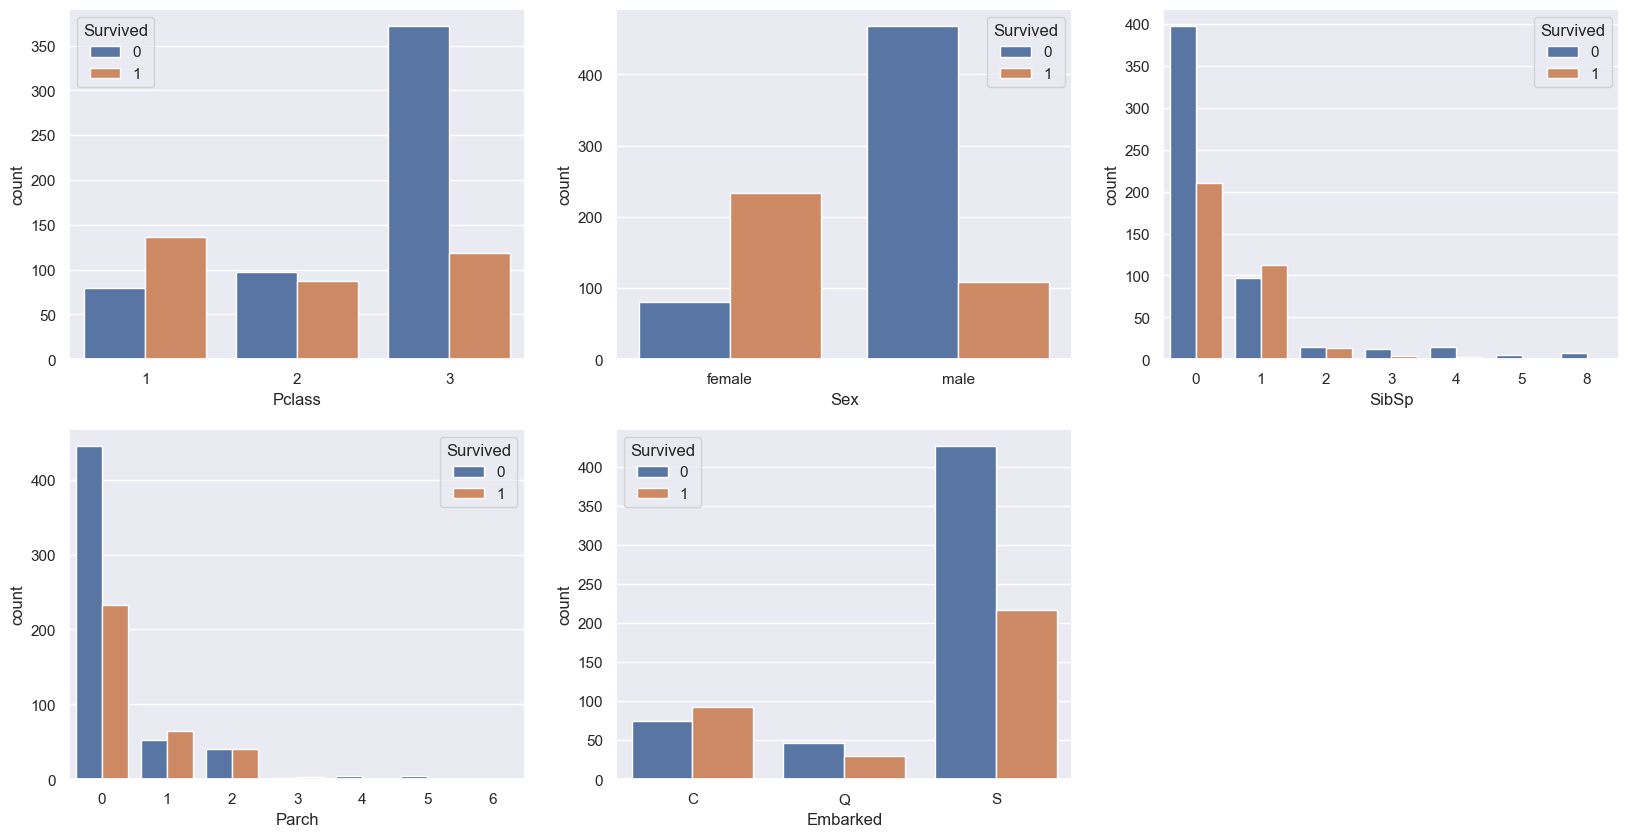

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
sns.countplot(x='Pclass', data=train_df, ax=ax[0, 0], hue= 'Survived');
sns.countplot(x='Sex', data=train_df, ax= ax[0, 1], hue='Survived');
sns.countplot(x='SibSp', data=train_df, ax=ax[0, 2], hue='Survived');
sns.countplot(x='Parch', data=train_df, ax=ax[1, 0], hue='Survived');
sns.countplot(x='Embarked', data=train_df, ax=ax[1, 1], hue='Survived');
ax.flat[-1].set_visible(False)


#### nummeric data

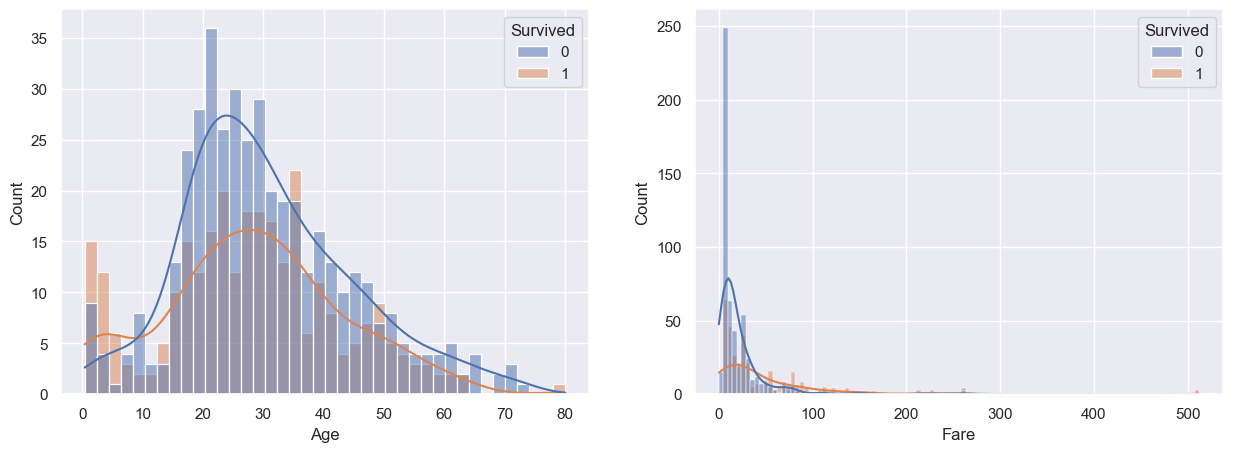

In [17]:
fig , ax = plt.subplots(ncols= 2, figsize = ( 15 , 5) )
sns.histplot(data= train_df, x='Age', hue='Survived', bins= 40, kde=True , ax= ax[0] );
sns.histplot(data= train_df, x='Fare', hue='Survived', kde= True, ax= ax[1] );

In [18]:
# rời rạc hóa fare feature
cat_fare_df = train_df.copy()
cat_fare_df['Fare'] = pd.qcut(train_df['Fare'], 4 , labels=['Economic', 'Standart', 'Expensive', 'Luxury'])

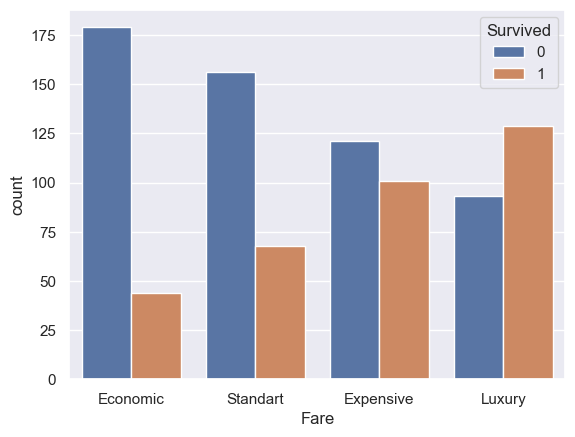

In [19]:
sns.countplot(x='Fare', data=cat_fare_df, hue='Survived');

### Feature Engineering and Data Wrangling

#### group SibSP and Parch become Family feature

In [20]:
train_df['Family'] = train_df['SibSp'].astype('int64') + train_df['Parch'].astype('int64')
test_df['Family'] = test_df['SibSp'].astype('int64') + test_df['Parch'].astype('int64')

In [21]:
train_df['Family'].value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

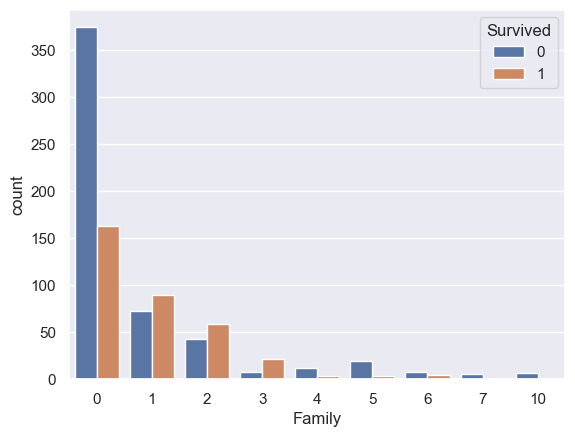

In [22]:
sns.countplot(x='Family', data=train_df, hue='Survived');

In [23]:
train_df['Family'] = pd.cut(train_df['Family'], bins= [-1, 1 , 4 , 6, 15], labels=['Single', 'Small', 'Medium', 'Large'])
test_df['Family'] = pd.cut(test_df['Family'], bins= [-1, 1 , 4 , 6, 15], labels=['Single', 'Small', 'Medium', 'Large'])

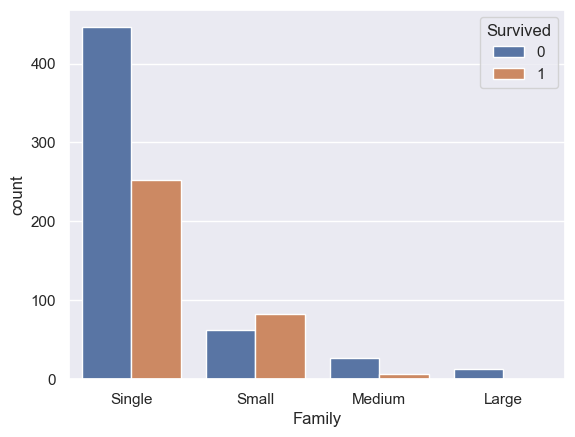

In [24]:
sns.countplot(x='Family', data=train_df, hue='Survived');

#### Name feature

In [25]:
train_df['Name'].sample(10)

798                  Ibrahim Shawah, Mr. Yousseff
512                     McGough, Mr. James Robert
777                 Emanuel, Miss. Virginia Ethel
141                      Nysten, Miss. Anna Sofia
38             Vander Planke, Miss. Augusta Maria
310                Hays, Miss. Margaret Bechstein
69                              Kink, Mr. Vincenz
272     Mellinger, Mrs. (Elizabeth Anne Maidment)
715    Soholt, Mr. Peter Andreas Lauritz Andersen
601                          Slabenoff, Mr. Petco
Name: Name, dtype: object

In [26]:
import re
def extract_title(name):
    title = re.compile(r',([\w\s]+)\.')
    return title.search(name).group(1).strip()
train_df['Title'] = train_df['Name'].apply( lambda name: extract_title(name) )
test_df['Title'] = test_df['Name'].apply( lambda name: extract_title(name) )

In [27]:
train_df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

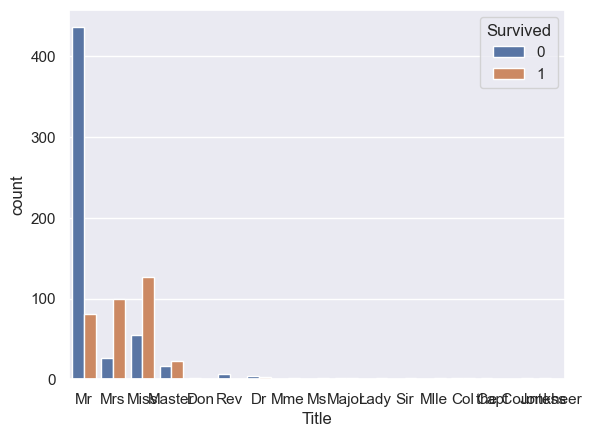

In [28]:
sns.countplot(x='Title', data=train_df, hue='Survived');

In [29]:
# số lượng title ít thì gom lại thành 1 nhóm
def group_title(title):
    if title in ['Mr', 'Miss', 'Mrs', 'Master']:
        return title
    elif title == 'Ms':
        return 'Miss'
    else:
        return 'Other'
train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))
test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [30]:
train_df['Title'].value_counts()

Title
Mr        517
Miss      183
Mrs       125
Master     40
Other      26
Name: count, dtype: int64

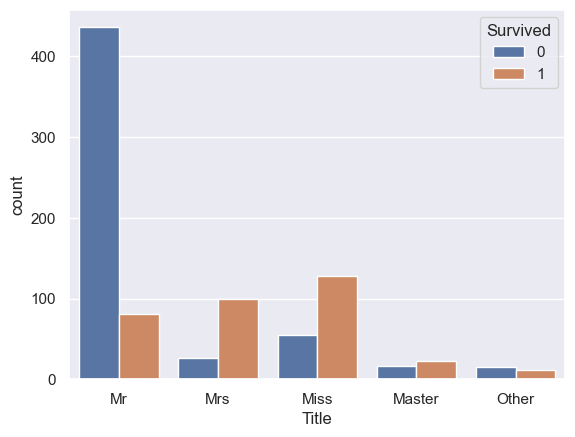

In [31]:
sns.countplot(x='Title' , data=train_df, hue='Survived');

#### Data Wangling


In [32]:
num_features = ['Age', 'Fare']
ctg_features = ['Pclass', 'Sex', 'Embarked', 'Family', 'Title']
feature_cols = num_features + ctg_features
feature_cols

['Age', 'Fare', 'Pclass', 'Sex', 'Embarked', 'Family', 'Title']

In [33]:
def display_missing(df, feature_cols):
    for feature in feature_cols:
        print(f'{feature} missing values: {df[feature].isnull().sum() / df.shape[0] * 100:.2f}%')
display_missing(train_df, feature_cols)
print('--------------------------------')
display_missing(test_df, feature_cols)

Age missing values: 19.87%
Fare missing values: 0.00%
Pclass missing values: 0.00%
Sex missing values: 0.00%
Embarked missing values: 0.22%
Family missing values: 0.00%
Title missing values: 0.00%
--------------------------------
Age missing values: 20.57%
Fare missing values: 0.24%
Pclass missing values: 0.00%
Sex missing values: 0.00%
Embarked missing values: 0.00%
Family missing values: 0.00%
Title missing values: 0.00%


##### Fill missing values

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
 11  Family    891 non-null    category
 12  Title     891 non-null    object  
dtypes: category(7), float64(2), object(4)
memory usage: 49.4+ KB


In [35]:
train_df.groupby(['Sex' , 'Pclass'])['Age'].median()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\3511221448.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['Sex' , 'Pclass'])['Age'].median()


Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [36]:
train_df['Age'].fillna(train_df.groupby(["Sex","Pclass"])['Age'].transform('median'),inplace=True)
test_df['Age'].fillna(test_df.groupby(['Sex' , 'Pclass'])['Age'].transform('median'), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\4199789577.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df['Age'].fillna(train_df.groupby(["Sex","Pclass"])['Age'].transform('median'),inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\4199789577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age

In [37]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\1323109931.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20604\1323109931.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [38]:
display_missing(train_df, feature_cols)
print('--------------------------------')
display_missing(test_df, feature_cols)

Age missing values: 0.00%
Fare missing values: 0.00%
Pclass missing values: 0.00%
Sex missing values: 0.00%
Embarked missing values: 0.00%
Family missing values: 0.00%
Title missing values: 0.00%
--------------------------------
Age missing values: 0.00%
Fare missing values: 0.00%
Pclass missing values: 0.00%
Sex missing values: 0.00%
Embarked missing values: 0.00%
Family missing values: 0.00%
Title missing values: 0.00%


##### Encoding categorical feature

In [39]:
train_df[feature_cols].dtypes

Age          float64
Fare         float64
Pclass      category
Sex         category
Embarked    category
Family      category
Title         object
dtype: object

In [40]:
X = train_df[feature_cols]
X_test = test_df[feature_cols]
y = train_df['Survived']

In [41]:
def OneHotEncodeing(df, features):
    return pd.get_dummies(df, columns=features)
X_test = OneHotEncodeing(X_test, ctg_features)
X = OneHotEncodeing(X, ctg_features)

##### Normalization numerical feature

In [42]:
def min_max_scaling(df, features):
    for feature in features:
        df[feature] = (df[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    return df
X = min_max_scaling(X, num_features)
X_test = min_max_scaling(X_test, num_features)

### Training model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix

In [44]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [45]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [46]:
y_pred = log_reg.predict(X_val)

In [47]:
precision_score(y_val, y_pred), recall_score(y_val, y_pred)

(0.7808219178082192, 0.7702702702702703)

In [48]:
log_reg.score(X_val, y_val)

0.8156424581005587

In [49]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



#### Polynomial Logistic Regression (nâng bậc của feature)

In [50]:
poly = PolynomialFeatures(degree=2) # tạo ra các feature bậc 2
poly_X_train = poly.fit_transform(X_train)
poly_X_val = poly.transform(X_val)

In [51]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [52]:
poly_log_reg.score(poly_X_val, y_val)

0.8212290502793296

#### Decision Tree

In [53]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8 , random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)

In [54]:
decision_tree.score(X_val, y_val)

0.770949720670391

#### Cross Validation
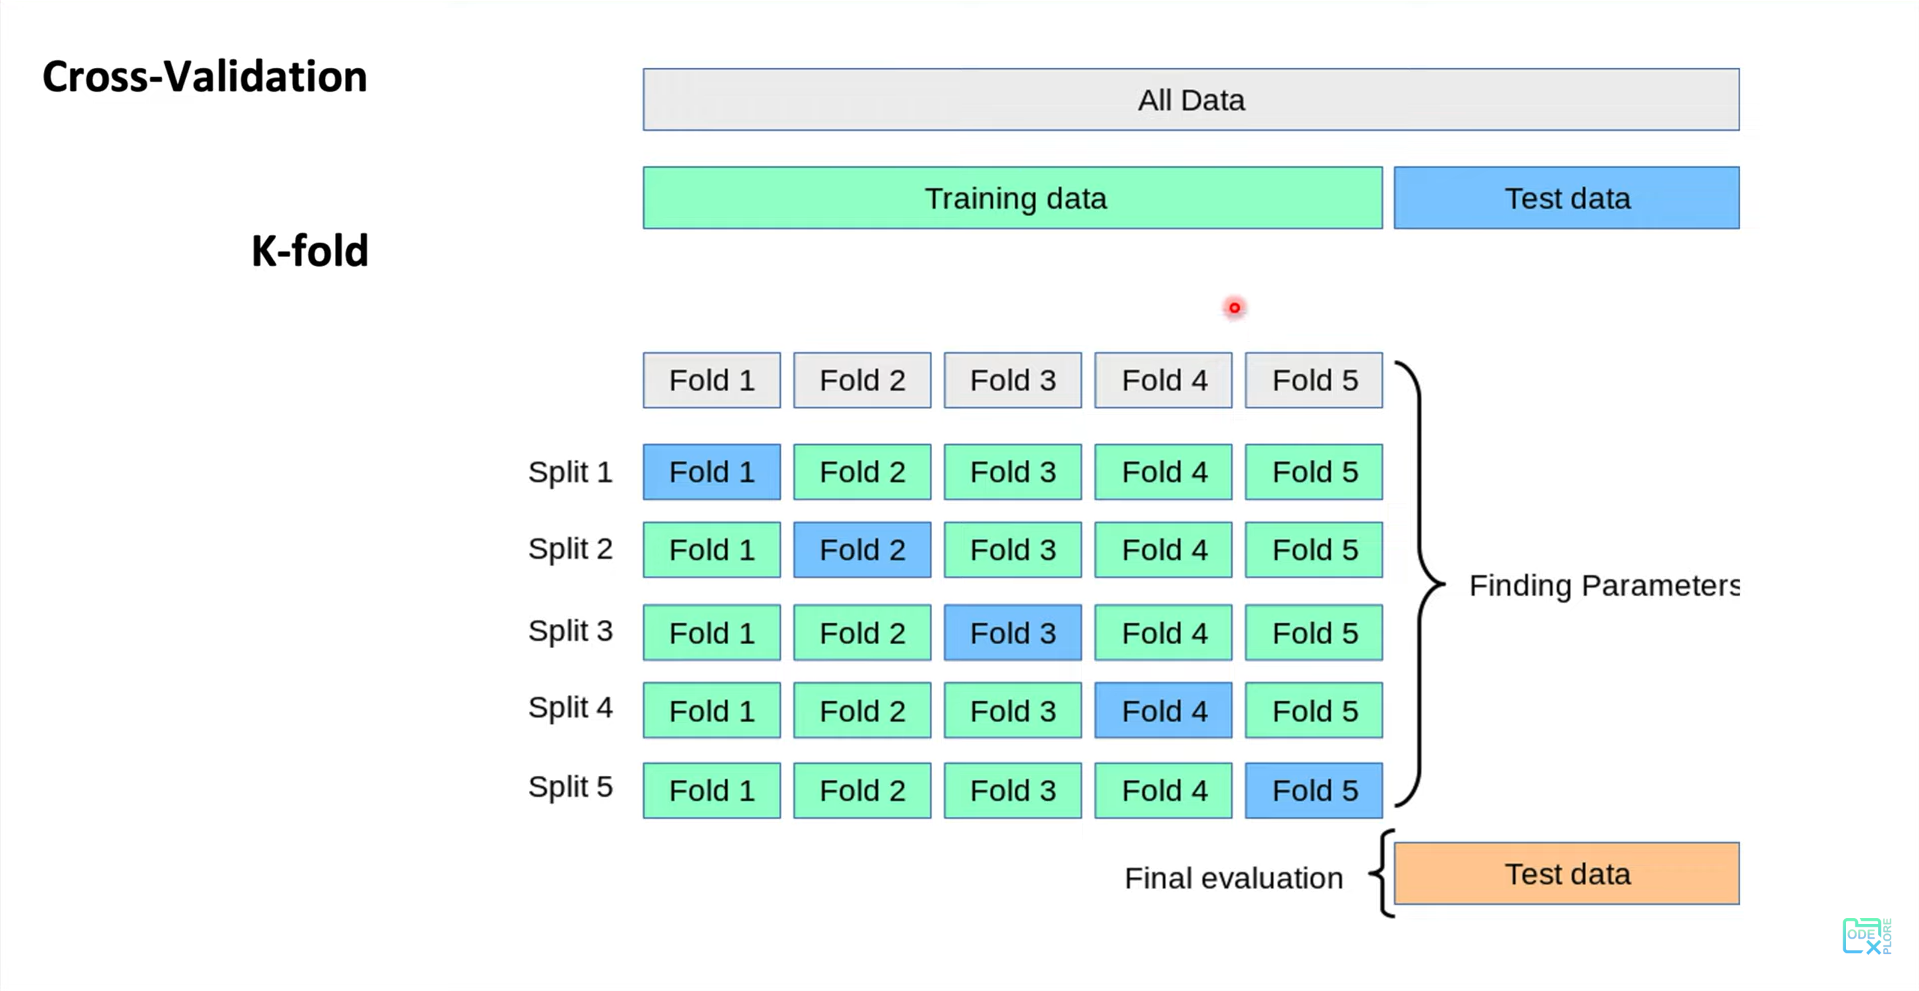

In [55]:
from sklearn.model_selection import cross_val_score
log_reg_cv = LogisticRegression(solver='liblinear', max_iter=1000)
decision_tree_cv = DecisionTreeClassifier( criterion='entropy', max_depth=8 , random_state=42)

log_reg_score = cross_val_score(log_reg_cv, X, y, cv=5)
log_reg_score

array([0.82122905, 0.80898876, 0.79213483, 0.79775281, 0.85955056])

In [56]:
log_reg_score.mean(), log_reg_score.std()

(0.8159312033142928, 0.023981803158362597)

In [57]:
decision_tree_score = cross_val_score(decision_tree_cv, X, y, cv=5)
decision_tree_score

array([0.79329609, 0.79775281, 0.82022472, 0.78651685, 0.80337079])

In [58]:
decision_tree_score.mean(), decision_tree_score.std()

(0.80023225158496, 0.011418574983873993)

#### Baseline Model Comparison

* Choosing the right estimator
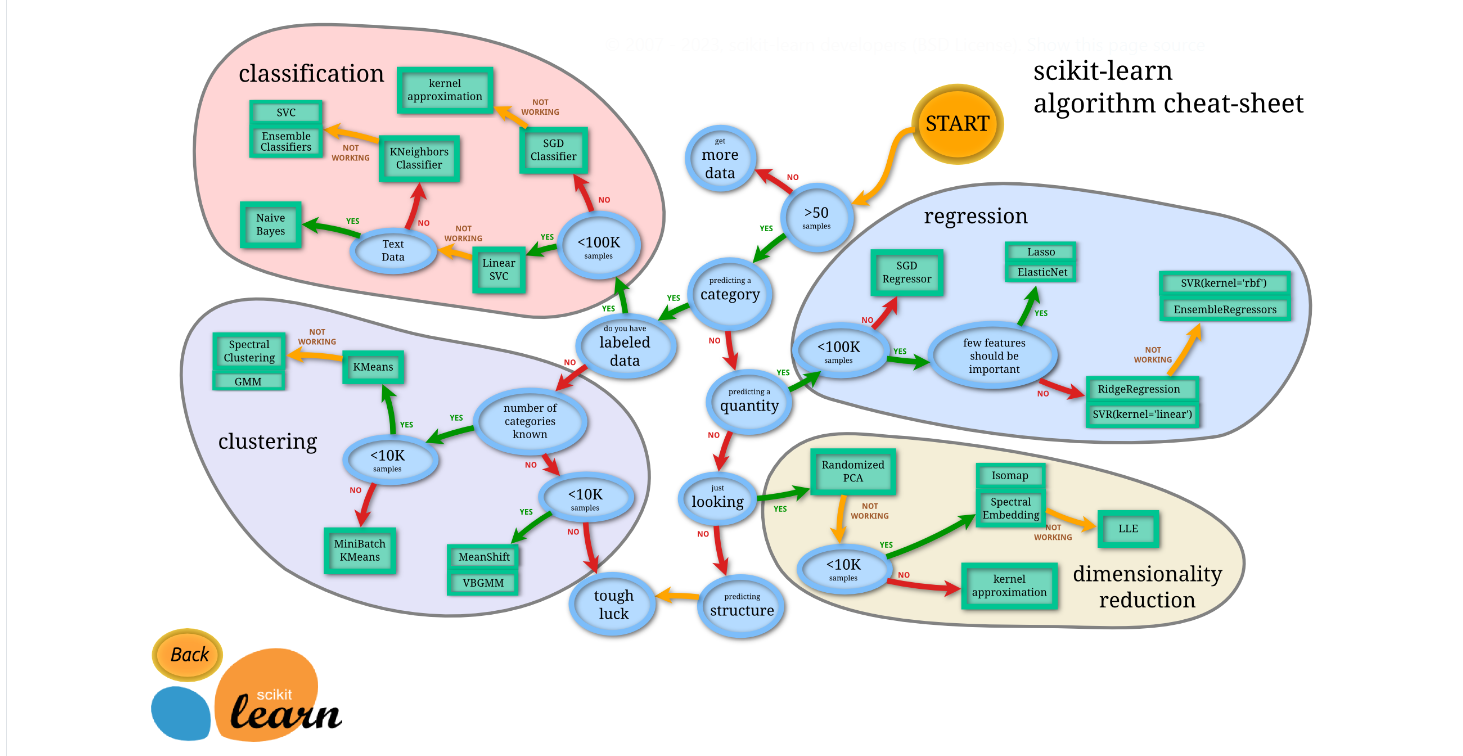

In [59]:
# !pip install xgboost

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier # !pip install xgboost

seed = 42
models= [
    LinearSVC(random_state=seed, max_iter=12000),
    SVC(random_state=seed),
    KNeighborsClassifier( metric= 'minkowski', p= 2),
    RandomForestClassifier(random_state=seed),
    LogisticRegression(solver='liblinear', max_iter=1000),
    DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier(used_label_encoder=False, eval_metric='logloss', random_state=seed),
]


In [61]:
def genarate_model_results(models, X, y, eval_metric= "accuracy", cv=5):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring=eval_metric, cv=cv)
        entries.append((model_name, scores.mean(), scores.std()))
    baseline_result = pd.DataFrame(entries, columns=['model_name', 'accuracy_mean', 'accuracy_std'])
    baseline_result = baseline_result.sort_values(by= 'accuracy_mean', ascending=False)
    return baseline_result

In [ ]:
results = genarate_model_results(models, X, y)

In [63]:
display(results)
print('model SVC cho ra ket qua tot nhat')

,model_name,accuracy_mean,accuracy_std
1,SVC,0.822685,0.022795
0,LinearSVC,0.818172,0.027944
4,LogisticRegression,0.815931,0.023982
8,XGBClassifier,0.814826,0.023468
7,AdaBoostClassifier,0.806999,0.029323
3,RandomForestClassifier,0.802479,0.029524
2,KNeighborsClassifier,0.801368,0.015824
5,DecisionTreeClassifier,0.800232,0.011419
6,ExtraTreesClassifier,0.786762,0.036025


model SVC cho ra ket qua tot nhat


### Submit

In [64]:
svc = SVC(random_state=seed)
svc.fit(X_train, y_train)
svc.score(X_val, y_val)

0.8100558659217877

In [65]:
y_pred = svc.predict(X_test)

In [66]:
type(test_id), type(y_pred)

(pandas.core.series.Series, numpy.ndarray)

In [67]:
result_df = pd.concat([test_id, pd.Series(y_pred, name='Survived')], axis=1, ignore_index=True)

In [68]:
result_df.columns = ['PassengerId', 'Survived']

In [69]:
result_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [71]:
result_df.to_csv('gender_submission.csv' , index=False)